<a href="https://colab.research.google.com/github/Nandishnandu/Nandishnandu/blob/main/Cognifyz_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis

# **Level 1**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset:
df=pd.read_csv("/content/sample_data/Cognifyz Dataset 1.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Unnamed: 21,"French, Japanese, Desserts"
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,NaN,NaN
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,NaN,NaN
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,NaN,NaN
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,NaN,NaN
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,NaN,NaN


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
df.shape

(9551, 23)

In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [18]:
# Identify null values
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


**Task** 1:
        Determine the top three most common cuisines in the dataset.

In [19]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [20]:
cuisine_counts = df['Cuisines'].str.split('.').explode('Cuisine').value_counts()
# The top three most common cuisine
top_three_cuisine = cuisine_counts.head(3)
print(top_three_cuisine)

Cuisines
North Indian             936
North Indian, Chinese    511
Fast Food                354
Name: count, dtype: int64


**Calculate** the percentage of Restraunts that serve each of Top cuisines.

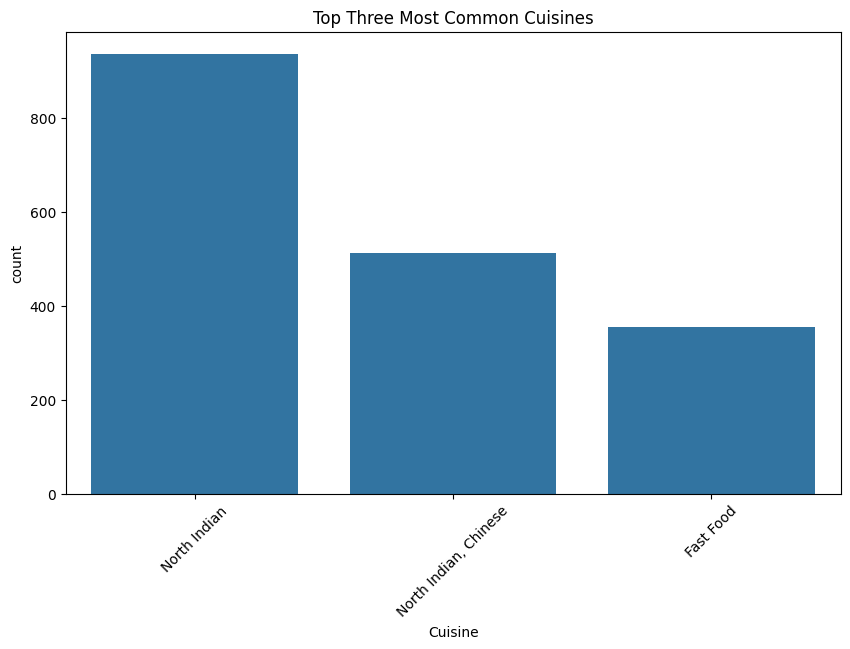

In [21]:
top_three_cuisine=top_three_cuisine.sort_values(ascending=False)
fig, Ax=plt.subplots(figsize=(10,6))
sns.barplot(x=top_three_cuisine.index, y=top_three_cuisine.values,ax=Ax)
plt.title('Top Three Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

## Calculate the percentage of Restraunts that serve each of Top cuisines.

In [22]:
top_restaurants = len(df)
percentage_per_cuisine=(top_three_cuisine/top_restaurants)*100
print(percentage_per_cuisine)

Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Fast Food                3.706418
Name: count, dtype: float64


In [23]:
print("Percentage of restaurants for top three cuisines")
percentage_per_cuisine

Percentage of restaurants for top three cuisines


,count
Cuisines,
North Indian,9.800021
"North Indian, Chinese",5.350225
Fast Food,3.706418


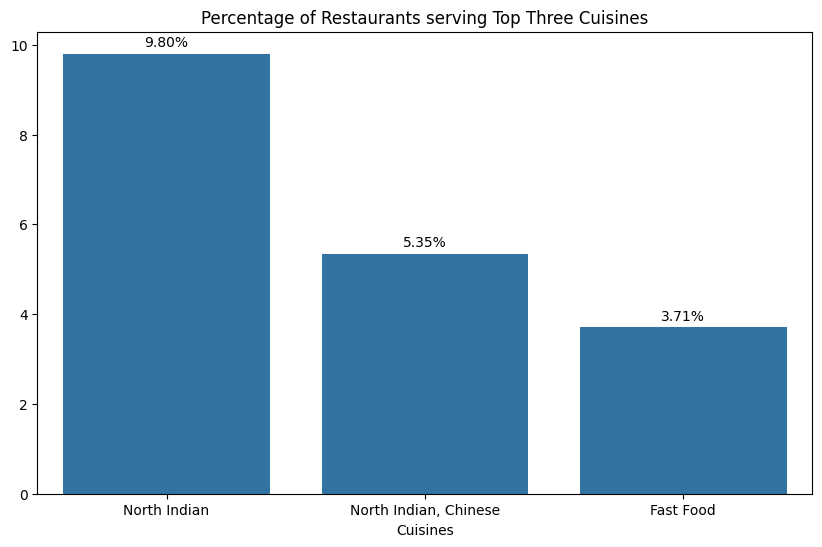

In [24]:
fig, Ax=plt.subplots(figsize=(10,6))
ab=sns.barplot(x=percentage_per_cuisine.index, y=percentage_per_cuisine.values)
for bar in ab.containers[0]:
  height=bar.get_height()
  ab.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0,3),textcoords='offset points', ha='center', va='bottom')
  plt.title('Percentage of Restaurants serving Top Three Cuisines')

**Task** 2: City Analysis

In [25]:
#Import all necessary libaries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Load the dataset:
df=pd.read_csv("/content/sample_data/Cognifyz Dataset 1.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Unnamed: 21,"French, Japanese, Desserts"
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,NaN,NaN
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,NaN,NaN
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,NaN,NaN
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,NaN,NaN
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,NaN,NaN


In [27]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Restaurant ID               9551 non-null   int64  
 1   Restaurant Name             9551 non-null   object 
 2   Country Code                9551 non-null   int64  
 3   City                        9551 non-null   object 
 4   Address                     9551 non-null   object 
 5   Locality                    9551 non-null   object 
 6   Locality Verbose            9551 non-null   object 
 7   Longitude                   9551 non-null   float64
 8   Latitude                    9551 non-null   float64
 9   Cuisines                    9551 non-null   object 
 10  Average Cost for two        9551 non-null   int64  
 11  Currency                    9551 non-null   object 
 12  Has Table booking           9551 non-null   object 
 13  Has Online delivery         9551 

**Identifythe city with the highest number of restaurants in the dataset**.

In [28]:
print(df['City'].value_counts()[[0]].index[0])

New Delhi


<ipython-input-28-f7d6f2ae9dad>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df['City'].value_counts()[[0]].index[0])


**Calculate the average for restaurants in each day**

In [29]:
#Create a Dataframe that holds the average rating for restaurants in each city:
average_restaurant_rating=df.groupby('City').agg(Average_rating=('Aggregate rating','mean')).sort_values(by='Average_rating')
print(average_restaurant_rating)

                  Average_rating
City                            
Faridabad               1.866932
Noida                   2.036204
Mc Millan               2.400000
Montville               2.400000
New Delhi               2.438845
...                          ...
Mandaluyong City        4.625000
Pasig City              4.633333
Makati City             4.650000
Quezon City             4.800000
Inner City              4.900000

[141 rows x 1 columns]


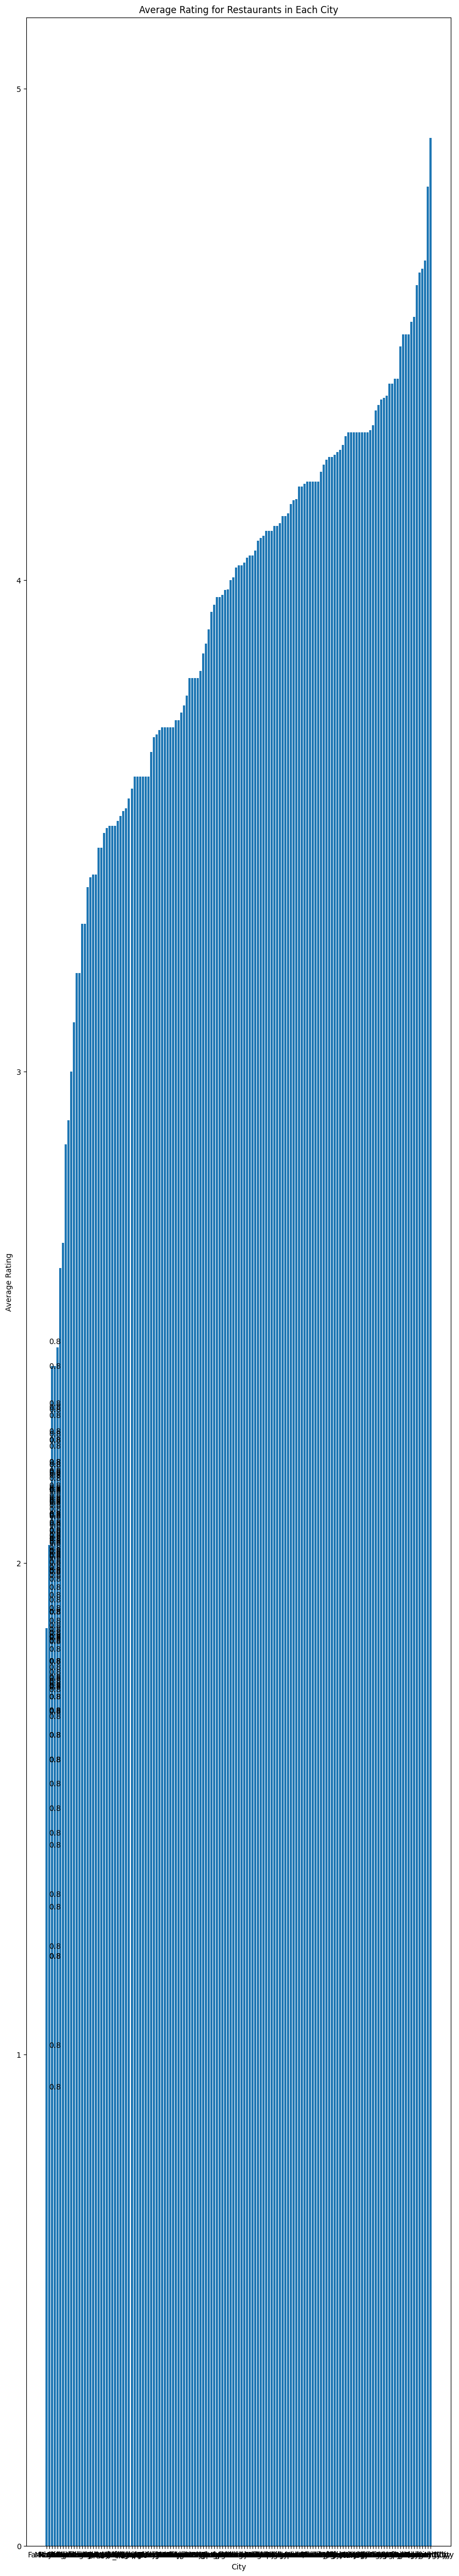

In [30]:
plt.subplots(figsize=(10,60))
#Grouping data
average_restaurant_rating=df.groupby('City').agg(average_rating=('Aggregate rating','mean')).sort_values(by='average_rating')
#Plotting
bars=plt.bar(average_restaurant_rating.index,average_restaurant_rating['average_rating'])
#adding labels
for bar in bars:
  plt.text(bar.get_width(),bar.get_y()+bar.get_height()/2,round(bar.get_width(),2),ha='left',va='center')

# adding title and labels
plt.title('Average Rating for Restaurants in Each City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

**The city with the highest average rating**.

In [31]:
average_restaurant_rating=df.groupby('City').agg(average_rating=('Aggregate rating','mean')).sort_values(by='average_rating')
print('the city with the highest average rating is',average_restaurant_rating.index[0])

the city with the highest average rating is Faridabad


Task 3:Price Range Distribution

In [44]:
#Import all necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#load the dataset:
df=pd.read_csv('/content/sample_data/Cognifyz Dataset 1.csv')

In [34]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Unnamed: 21,"French, Japanese, Desserts"
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,NaN,NaN
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,NaN,NaN
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,NaN,NaN
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,NaN,NaN
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,NaN,NaN


In [35]:
df.shape

(9551, 23)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Restaurant ID               9551 non-null   int64  
 1   Restaurant Name             9551 non-null   object 
 2   Country Code                9551 non-null   int64  
 3   City                        9551 non-null   object 
 4   Address                     9551 non-null   object 
 5   Locality                    9551 non-null   object 
 6   Locality Verbose            9551 non-null   object 
 7   Longitude                   9551 non-null   float64
 8   Latitude                    9551 non-null   float64
 9   Cuisines                    9551 non-null   object 
 10  Average Cost for two        9551 non-null   int64  
 11  Currency                    9551 non-null   object 
 12  Has Table booking           9551 non-null   object 
 13  Has Online delivery         9551 

Create a histogram or bar chart to visualize the distribution of prices ranges among the restaurants.

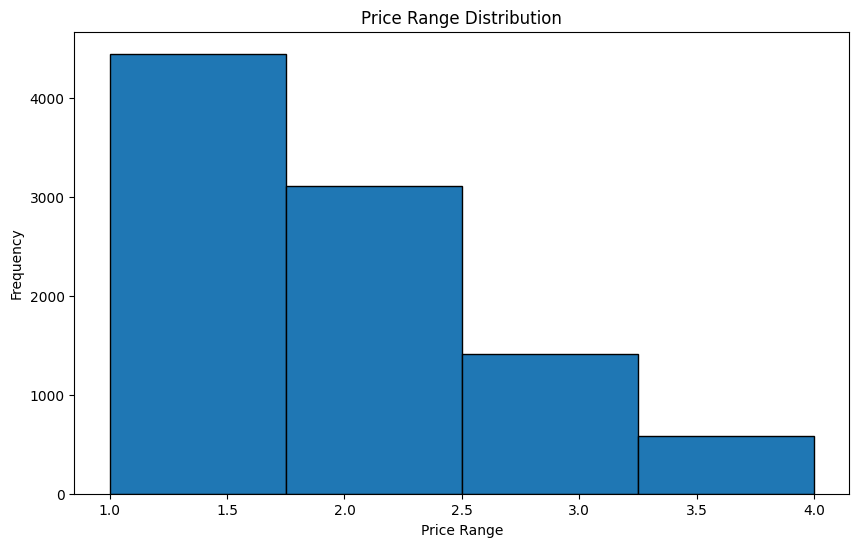

In [37]:
plt.subplots(figsize=(10,6))
plt.hist(df['Price range'],bins=df['Price range'].nunique(),edgecolor='black')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

Calculate the percentages of restaurant in each price range category.

In [38]:
#creates a dataframe which holds the counts of restuarants by each price range:

In [39]:
price_range_counts=df['Price range'].value_counts().reset_index()
price_range_counts

,Price range,count
0,1,4444
1,2,3113
2,3,1408
3,4,586


In [40]:
import pandas as pd

#Assuming you have data stored in a Dataframe called 'df'

#Create a DataFrame to hold the counts of restaurants in each price range
price_range_counts = df['Price range'].value_counts().reset_index()

#Calculate the total number of resturants
total_resturants = len(df)

#Calclate The percentage of restaurants in each range category
# Use the 'normalize' argument in value count to get percentages directly
percentage_per_price_range = df['Price range'].value_counts(normalize=True) * 100

#Print result
print("Percentage of restaurants in each price range category:")
for price_range, percentage in percentage_per_price_range.items():
  print(f"{price_range}: {percentage:2f}%")

Percentage of restaurants in each price range category:
1: 46.529159%
2: 32.593446%
3: 14.741912%
4: 6.135483%


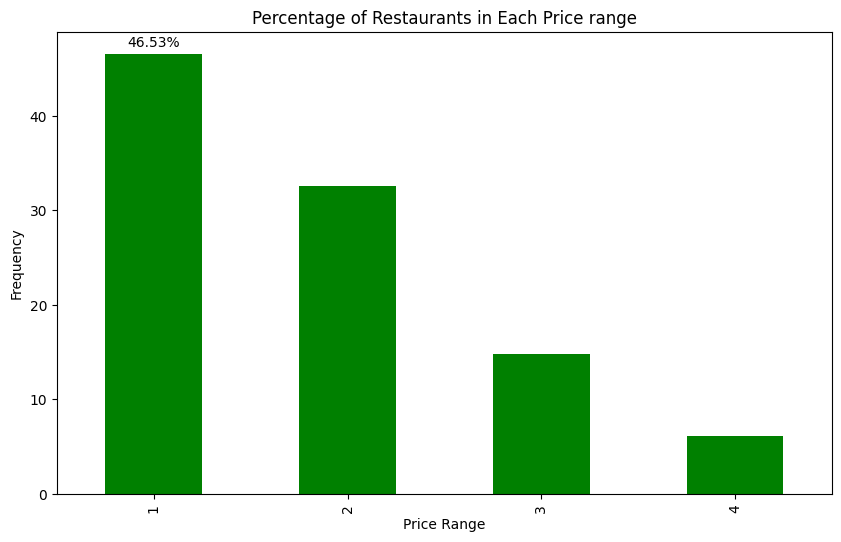

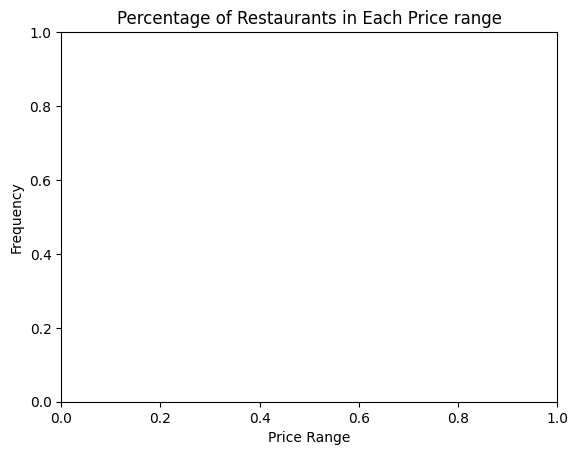

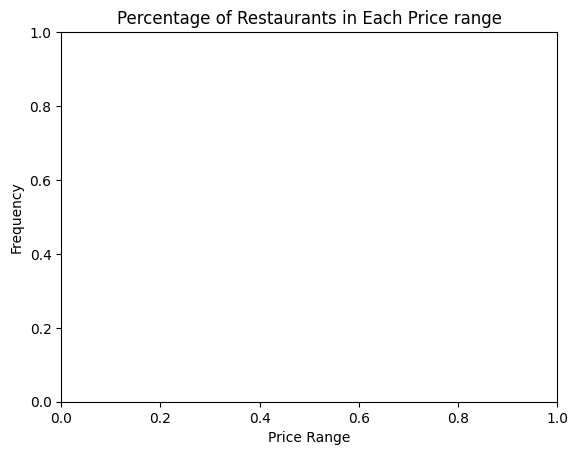

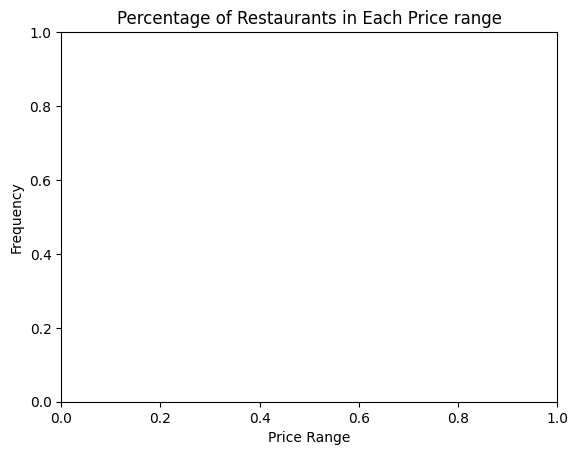

In [41]:
fig,ax=plt.subplots(figsize=(10,6))
percentage_per_price_range.plot(kind='bar',ax=ax,color='green')
for bar in ax.containers[0]:
  height=bar.get_height()
  ax.annotate(f'{height:.2f}%',xy=(bar.get_x()+bar.get_width()/2,height),xytext=(0,3),textcoords='offset points',ha='center',va='bottom')
  plt.title('Percentage of Restaurants in Each Price range')
  plt.xlabel('Price Range')
  plt.ylabel('Frequency')
  plt.show()

**Task 4**

Task: Online Delivery

In [46]:
#import all necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#load the dataset
df=pd.read_csv('/content/sample_data/Cognifyz Dataset 1.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Unnamed: 21,"French, Japanese, Desserts"
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,NaN,NaN
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,NaN,NaN
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,NaN,NaN
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,NaN,NaN
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,NaN,NaN


In [48]:
#numbers of rows and Columns name and datatype:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Restaurant ID               9551 non-null   int64  
 1   Restaurant Name             9551 non-null   object 
 2   Country Code                9551 non-null   int64  
 3   City                        9551 non-null   object 
 4   Address                     9551 non-null   object 
 5   Locality                    9551 non-null   object 
 6   Locality Verbose            9551 non-null   object 
 7   Longitude                   9551 non-null   float64
 8   Latitude                    9551 non-null   float64
 9   Cuisines                    9551 non-null   object 
 10  Average Cost for two        9551 non-null   int64  
 11  Currency                    9551 non-null   object 
 12  Has Table booking           9551 non-null   object 
 13  Has Online delivery         9551 

**Determine the percentage of restaurants that offer online delivery.**

In [56]:
total_online_delivery_restaurants=len(df[df['Has Online delivery']=='Yes'])
total_restaurants=len(df)
percentage_online_delivery=(total_online_delivery_restaurants/total_restaurants)*100
print("the percentage of restaurants that offer online delivery is",percentage_online_delivery)

the percentage of restaurants that offer online delivery is 25.662234321013504


**The average rating of restaurants with and without online delivery.**

In [61]:
#Average rating restaurants with online delivery:
restaurants_with_online_delivery=df[df['Has Online delivery']=='Yes']
average_rating_with_online_delivery=restaurants_with_online_delivery['Aggregate rating'].mean()
print("average rating of restaurants with online delivery is",(average_rating_with_online_delivery))

average rating of restaurants with online delivery is 3.2488372093023257


In [67]:
#Average rating restaurants without online delivery:
restaurants_without_online_delivery=df[df['Has Online delivery']=='No']
average_rating_without_online_delivery=restaurants_without_online_delivery['Aggregate rating'].mean()
print('average_rating_without_online_delivery:',round(average_rating_without_online_delivery,2))

average_rating_without_online_delivery: 2.47


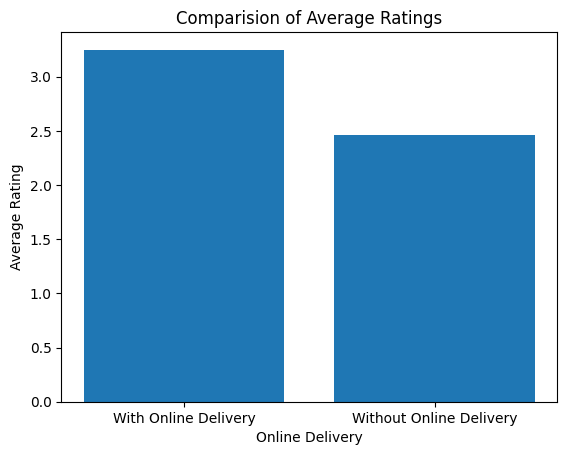

In [68]:
labels=['With Online Delivery','Without Online Delivery']
average_ratings=[average_rating_with_online_delivery,average_rating_without_online_delivery]

plt.bar(labels, average_ratings)
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.title('Comparision of Average Ratings')
plt.show()

**Level 2**

**Task 1 :Restaurant Ratings**

In [69]:
#import all necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv('/content/sample_data/Cognifyz Dataset 1.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Unnamed: 21,"French, Japanese, Desserts"
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,NaN,NaN
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,NaN,NaN
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,NaN,NaN
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,NaN,NaN
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,NaN,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Restaurant ID               9551 non-null   int64  
 1   Restaurant Name             9551 non-null   object 
 2   Country Code                9551 non-null   int64  
 3   City                        9551 non-null   object 
 4   Address                     9551 non-null   object 
 5   Locality                    9551 non-null   object 
 6   Locality Verbose            9551 non-null   object 
 7   Longitude                   9551 non-null   float64
 8   Latitude                    9551 non-null   float64
 9   Cuisines                    9551 non-null   object 
 10  Average Cost for two        9551 non-null   int64  
 11  Currency                    9551 non-null   object 
 12  Has Table booking           9551 non-null   object 
 13  Has Online delivery         9551 

**Analyze the distribution of aggregate ratings and determine the most common rating range.**

In [74]:
aggregate_ratings = df['Aggregate rating']
rating_counts = aggregate_ratings.value_counts().sort_index()

In [76]:
most_common_rating_range = rating_counts.idxmax()
print("Most common rating range:", most_common_rating_range)

Most common rating range: 0.0


**Calculate the average number of votes received by restaurants.**

In [77]:
average_votes = df['Votes'].mean()
print("Average number of votes received by restaurants:", average_votes)

Average number of votes received by restaurants: 156.909747670401


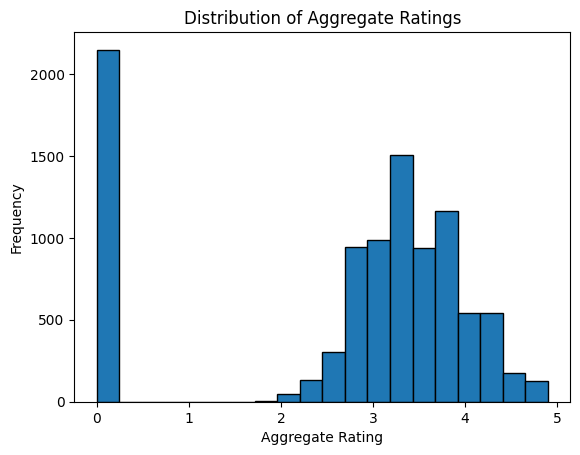

In [78]:
plt.hist(aggregate_ratings, bins=20, edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.show()

**Task 2: Cuisine Combination**

In [79]:
#import all necessary libraries
import numpy as np
import pandas as pd

In [80]:
df=pd.read_csv('/content/sample_data/Cognifyz Dataset 1.csv')

**Identify the most common combinations of cuisines in the dataset**

In [81]:
cuisines = df["Cuisines"]
aggregate_ratings = df["Aggregate rating"]

In [82]:
cuisine_combinations_counts = cuisines.value_counts()

In [94]:
most_common_cuisine_combinations = cuisine_combinations_counts.head(10)
print("Most common cuisine combinations:")
print(most_common_cuisine_combinations)

Most common cuisine combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [106]:
cuisine_combinations_avg_rating = df.groupby('Cuisines')["Aggregate rating"].mean().sort_values(ascending=False)

**Determine if certain cuisine combination tend to have higher ratings.**

In [107]:
top_10_avg_ratings = cuisine_combinations_avg_rating.nlargest(10)
print("\nAverage ratings for the top 10 cuisine combinations:")
print(top_10_avg_ratings)


Average ratings for the top 10 cuisine combinations:
Cuisines
Continental, Indian             4.9
BBQ, Breakfast, Southern        4.9
Italian, Deli                   4.9
American, Caribbean, Seafood    4.9
Burger, Bar Food, Steak         4.9
American, Burger, Grill         4.9
Italian, Bakery, Continental    4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
American, Coffee and Tea        4.9
Name: Aggregate rating, dtype: float64


Task 3: Geographic Analysis

In [108]:
pip install folium

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import folium
from folium.plugins import HeatMap


In [111]:
df=pd.read_csv("/content/sample_data/Cognifyz Dataset 1.csv")

**Plot the locations of restaurants on a map using longitude and latitude coordinates**

In [112]:
restaurant_names = df['Restaurant Name']
latitude = df['Latitude']
longitude = df['Longitude']

In [135]:
print(df[["Longitude", "Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [136]:
pip install geopandas

In [148]:
pip install geodatasets

In [150]:
import geopandas
from geodatasets import get_path

In [144]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

In [151]:
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

<Axes: >

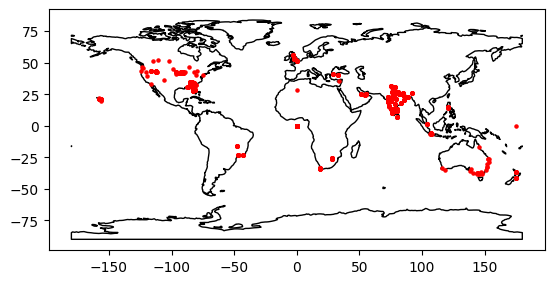

In [176]:
world = geopandas.read_file(get_path("naturalearth,land"))
ax = world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

In [153]:
plt.show()

**Identify any patterns or clusters of resturants in specific areas.**

In [155]:
world_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=1, height='100%', width ='100%')

In [160]:
heat_marker = [[row['Latitude'], row['Longitude']] for i, row in df.iterrows()]
HeatMap(heat_marker, radius=10).add_to(world_map)


In [161]:
world_map

**Task 4: Restaurant Chains**

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [163]:
df=pd.read_csv('/content/sample_data/Cognifyz Dataset 1.csv')

**Identify if there are any restaurant chains present in the dataset.**

In [164]:
restaurant_chain = df.groupby("Restaurant Name").size().reset_index(name="OutletCount")
new = restaurant_chain[restaurant_chain["OutletCount"] > 1]
restaurant_chains = new.sort_values(by="OutletCount", ascending=False)

In [166]:
print(restaurant_chains[["Restaurant Name", "OutletCount"]].head(10))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


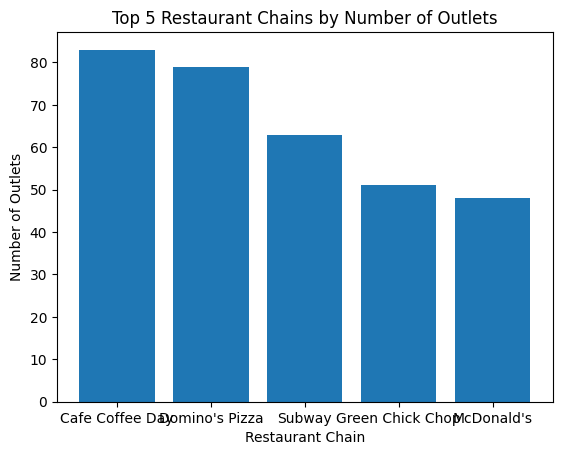

In [167]:
plt.bar(restaurant_chains["Restaurant Name"][:5], restaurant_chains["OutletCount"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

**Analyze the ratings and Popularity of different restaurant chains**

In [169]:
ratings = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name="Average Rating").sort_values(by="Average Rating", ascending=False)
print(ratings)

                      Restaurant Name  Average Rating
5322   Restaurant Mosaic @ The Orient             4.9
4177                 Ministry of Crab             4.9
4135                            Miann             4.9
5757          Shorts Burger and Shine             4.9
4165                            Milse             4.9
...                               ...             ...
1105                      Cafe Corner             0.0
4905                  Pheva Tandooris             0.0
4913                     Pick & Carry             0.0
1096                     Cafe Brownie             0.0
2292  Famous Parantha and Poori Sabzi             0.0

[7446 rows x 2 columns]


In [170]:
votes = df.groupby("Restaurant Name")["Votes"].sum().reset_index(name="Total Votes").sort_values(by="Total Votes", ascending=False)
print(votes)

                Restaurant Name  Total Votes
663             Barbeque Nation        28142
101   AB's - Absolute Barbecues        13400
6943                       Toit        10934
785                   Big Chill        10853
2297                 Farzi Cafe        10098
...                         ...          ...
4375                  Muncheezz            0
6217            Swiss Gourmessa            0
2110      Dosa and Pizza Corner            0
6215            Sweets n Treats            0
2433               Food Station            0

[7446 rows x 2 columns]


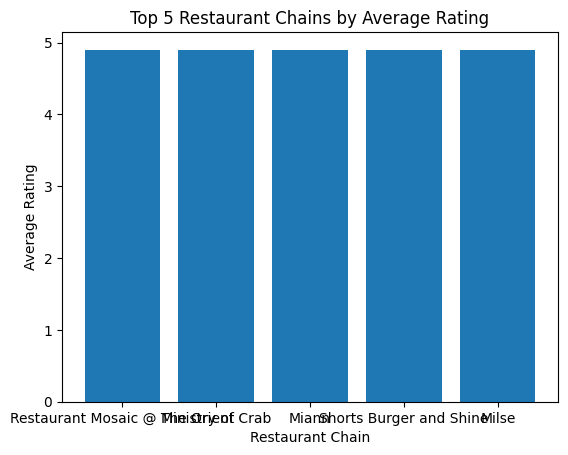

In [172]:
plt.bar(ratings["Restaurant Name"][:5], ratings["Average Rating"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.title("Top 5 Restaurant Chains by Average Rating")
plt.show()

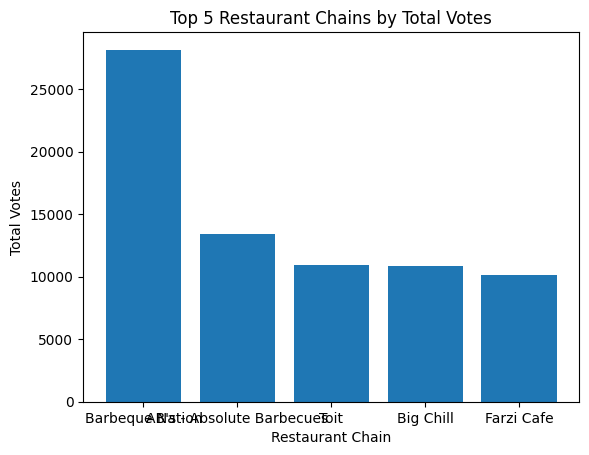

In [174]:
plt.bar(votes["Restaurant Name"][:5], votes["Total Votes"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.title("Top 5 Restaurant Chains by Total Votes")
plt.tight_layout
plt.show()